<a href="https://colab.research.google.com/github/DK45P3R/TCC2024/blob/main/Scripts/KNN_Treino_Grafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo KNN

API calls

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pickle

# Carregar os arquivos CSV
data_benign = pd.read_csv('api_calls_2b.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip')
data_malign = pd.read_csv('api_calls_2m.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip')

# Adicionar coluna de rótulo
data_malign['label'] = 1
data_benign['label'] = 0

# Remover a coluna "Nome do Arquivo" de cada dataset
data_benign = data_benign.drop(columns=['Nome do Arquivo'])
data_malign = data_malign.drop(columns=['Nome do Arquivo'])

# Concatenar os dados
data = pd.concat([data_benign, data_malign], ignore_index=True)

# Preencher valores faltantes com 0
data = data.fillna(0)

# Remover colunas não numéricas (como hashes, nomes de arquivos, etc.)
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Separar características e rótulos
X = data.drop('label', axis=1)  # Remove a coluna 'label'
y = data['label']

# Verificar e corrigir rótulos fora do esperado (0 e 1)
invalid_classes = set(np.unique(y)) - {0, 1}
if invalid_classes:
    print(f"Classes inválidas encontradas: {invalid_classes}")
    y = np.where(y > 1, 1, y)  # Corrigir valores > 1 para 1
    print(f"Classes corrigidas: {np.unique(y)}")

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Padronizar os dados com StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir o intervalo de valores para n_neighbors
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20, 50, 75, 100]}

# Realizar busca em grid para encontrar o melhor n_neighbors
grid_search = GridSearchCV(KNeighborsClassifier(weights='distance'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor valor de n_neighbors encontrado
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"\nMelhor valor de n_neighbors: {best_n_neighbors}")

# Usar o melhor modelo encontrado no GridSearch
knn_best = grid_search.best_estimator_

# Fazer previsões com o melhor modelo
y_pred = knn_best.predict(X_test)

# Gerar o relatório de classificação
report = classification_report(y_test, y_pred, target_names=['benigno', 'maligno'])
print("\nRelatório de Classificação:\n", report)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

# Validar o modelo com validação cruzada (5-fold)
cv_scores = cross_val_score(knn_best, X, y, cv=5)
print("\nValidação Cruzada (5-fold) - Acurácia Média:", cv_scores.mean())

# Salvando o modelo treinado
arquivo_pickle = "KNN_API_best.sav"
pickle.dump(knn_best, open(arquivo_pickle, 'wb'))



Melhor valor de n_neighbors: 50

Relatório de Classificação:
               precision    recall  f1-score   support

     benigno       1.00      0.97      0.99       277
     maligno       0.96      1.00      0.98       166

    accuracy                           0.98       443
   macro avg       0.98      0.99      0.98       443
weighted avg       0.98      0.98      0.98       443

Matriz de Confusão:
 [[270   7]
 [  0 166]]

Validação Cruzada (5-fold) - Acurácia Média: 0.9656884875846501


Opcodes

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pickle

# Carregar os arquivos CSV
data_benign = pd.read_csv('opcodes_2b.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip')
data_malign = pd.read_csv('opcodes_2m.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip')

# Adicionar coluna de rótulo
data_malign['label'] = 1
data_benign['label'] = 0

# Remover a coluna "Nome do Arquivo" de cada dataset
data_benign = data_benign.drop(columns=['Nome do Arquivo'])
data_malign = data_malign.drop(columns=['Nome do Arquivo'])

# Concatenar os dados
data = pd.concat([data_benign, data_malign], ignore_index=True)

# Preencher valores faltantes com 0
data = data.fillna(0)

# Remover colunas não numéricas (como hashes, nomes de arquivos, etc.)
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Separar características e rótulos
X = data.drop('label', axis=1)  # Remove a coluna 'label'
y = data['label']

# Verificar e corrigir rótulos fora do esperado (0 e 1)
invalid_classes = set(np.unique(y)) - {0, 1}
if invalid_classes:
    print(f"Classes inválidas encontradas: {invalid_classes}")
    y = np.where(y > 1, 1, y)  # Corrigir valores > 1 para 1
    print(f"Classes corrigidas: {np.unique(y)}")

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Padronizar os dados com StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir o intervalo de valores para n_neighbors
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20, 50, 75, 100]}

# Realizar busca em grid para encontrar o melhor n_neighbors
grid_search = GridSearchCV(KNeighborsClassifier(weights='distance'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor valor de n_neighbors encontrado
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"\nMelhor valor de n_neighbors: {best_n_neighbors}")

# Usar o melhor modelo encontrado no GridSearch
knn_best = grid_search.best_estimator_

# Fazer previsões com o melhor modelo
y_pred = knn_best.predict(X_test)

# Gerar o relatório de classificação
report = classification_report(y_test, y_pred, target_names=['benigno', 'maligno'])
print("\nRelatório de Classificação:\n", report)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

# Validar o modelo com validação cruzada (5-fold)
cv_scores = cross_val_score(knn_best, X, y, cv=5)
print("\nValidação Cruzada (5-fold) - Acurácia Média:", cv_scores.mean())

# Salvando o modelo treinado
arquivo_pickle = "KNN_Op_test.sav"
pickle.dump(knn_best, open(arquivo_pickle, 'wb'))



Melhor valor de n_neighbors: 3

Relatório de Classificação:
               precision    recall  f1-score   support

     benigno       0.95      0.97      0.96       195
     maligno       0.95      0.90      0.93       105

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300

Matriz de Confusão:
 [[190   5]
 [ 10  95]]

Validação Cruzada (5-fold) - Acurácia Média: 0.919953177257525


Permissions

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pickle

# Carregar os arquivos CSV
data_benign = pd.read_csv('permissions_2b.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip')
data_malign = pd.read_csv('permissions_2m.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip')

# Adicionar coluna de rótulo
data_malign['label'] = 1
data_benign['label'] = 0

# Remover a coluna "Nome do Arquivo" de cada dataset
data_benign = data_benign.drop(columns=['Nome do Arquivo'])
data_malign = data_malign.drop(columns=['Nome do Arquivo'])

# Concatenar os dados
data = pd.concat([data_benign, data_malign], ignore_index=True)

# Preencher valores faltantes com 0
data = data.fillna(0)

# Remover colunas não numéricas (como hashes, nomes de arquivos, etc.)
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Separar características e rótulos
X = data.drop('label', axis=1)  # Remove a coluna 'label'
y = data['label']

# Verificar e corrigir rótulos fora do esperado (0 e 1)
invalid_classes = set(np.unique(y)) - {0, 1}
if invalid_classes:
    print(f"Classes inválidas encontradas: {invalid_classes}")
    y = np.where(y > 1, 1, y)  # Corrigir valores > 1 para 1
    print(f"Classes corrigidas: {np.unique(y)}")

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Padronizar os dados com StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir o intervalo de valores para n_neighbors
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20, 50, 75, 100]}

# Realizar busca em grid para encontrar o melhor n_neighbors
grid_search = GridSearchCV(KNeighborsClassifier(weights='distance'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor valor de n_neighbors encontrado
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"\nMelhor valor de n_neighbors: {best_n_neighbors}")

# Usar o melhor modelo encontrado no GridSearch
knn_best = grid_search.best_estimator_

# Fazer previsões com o melhor modelo
y_pred = knn_best.predict(X_test)

# Gerar o relatório de classificação
report = classification_report(y_test, y_pred, target_names=['benigno', 'maligno'])
print("\nRelatório de Classificação:\n", report)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

# Validar o modelo com validação cruzada (5-fold)
cv_scores = cross_val_score(knn_best, X, y, cv=5)
print("\nValidação Cruzada (5-fold) - Acurácia Média:", cv_scores.mean())

# Salvando o modelo treinado
arquivo_pickle = "KNN_P_best.sav"
pickle.dump(knn_best, open(arquivo_pickle, 'wb'))



Melhor valor de n_neighbors: 15

Relatório de Classificação:
               precision    recall  f1-score   support

     benigno       0.67      0.71      0.69       284
     maligno       0.60      0.55      0.57       218

    accuracy                           0.64       502
   macro avg       0.64      0.63      0.63       502
weighted avg       0.64      0.64      0.64       502

Matriz de Confusão:
 [[203  81]
 [ 98 120]]

Validação Cruzada (5-fold) - Acurácia Média: 0.6206614659127959



Melhor valor de n_neighbors para API_Calls: 50

Relatório de Classificação para API_Calls:
               precision    recall  f1-score   support

     benigno       1.00      0.97      0.99       277
     maligno       0.96      1.00      0.98       166

    accuracy                           0.98       443
   macro avg       0.98      0.99      0.98       443
weighted avg       0.98      0.98      0.98       443

Matriz de Confusão para API_Calls:
 [[270   7]
 [  0 166]]


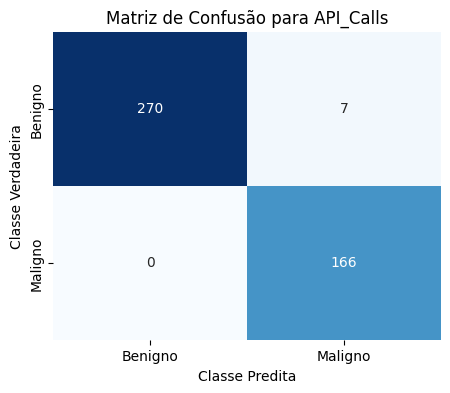


Validação Cruzada (5-fold) - Acurácia Média para API_Calls: 0.9656884875846501

Melhor valor de n_neighbors para Opcodes: 3

Relatório de Classificação para Opcodes:
               precision    recall  f1-score   support

     benigno       0.95      0.97      0.96       195
     maligno       0.95      0.90      0.93       105

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300

Matriz de Confusão para Opcodes:
 [[190   5]
 [ 10  95]]


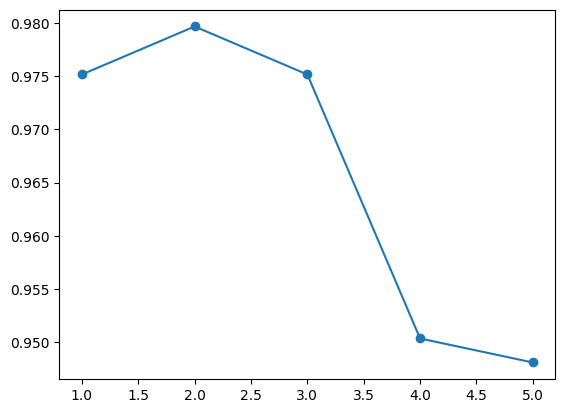

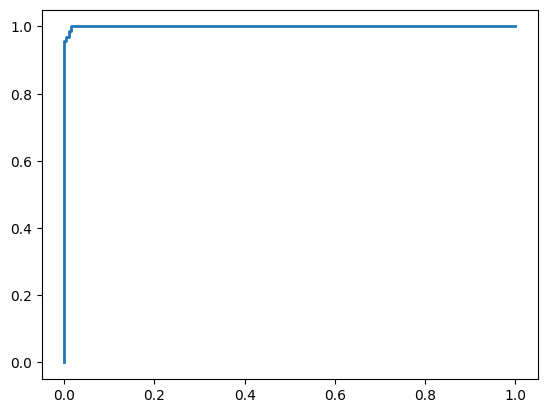

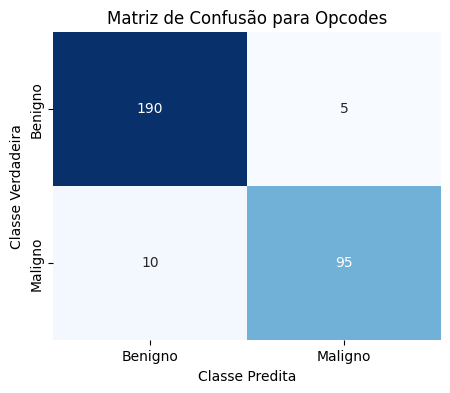


Validação Cruzada (5-fold) - Acurácia Média para Opcodes: 0.919953177257525

Melhor valor de n_neighbors para Permissions: 15

Relatório de Classificação para Permissions:
               precision    recall  f1-score   support

     benigno       0.67      0.71      0.69       284
     maligno       0.60      0.55      0.57       218

    accuracy                           0.64       502
   macro avg       0.64      0.63      0.63       502
weighted avg       0.64      0.64      0.64       502

Matriz de Confusão para Permissions:
 [[203  81]
 [ 98 120]]


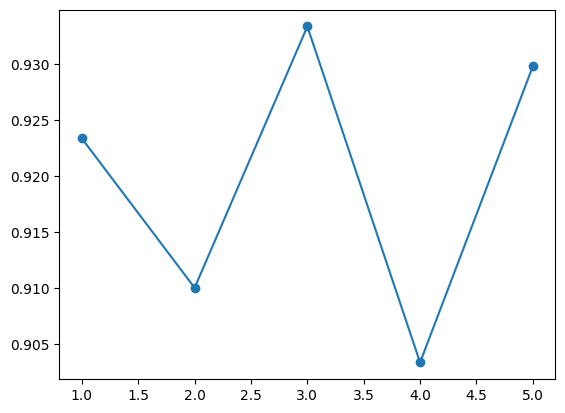

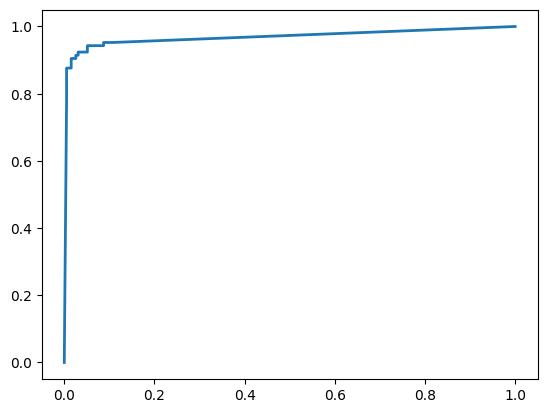

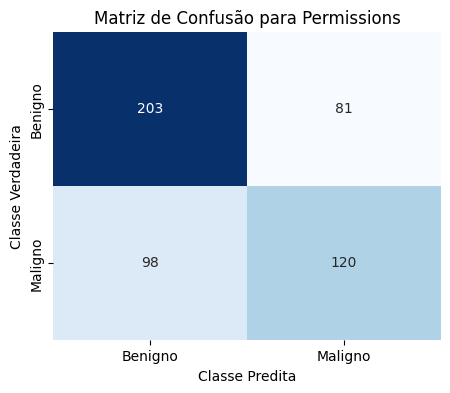


Validação Cruzada (5-fold) - Acurácia Média para Permissions: 0.6206614659127959


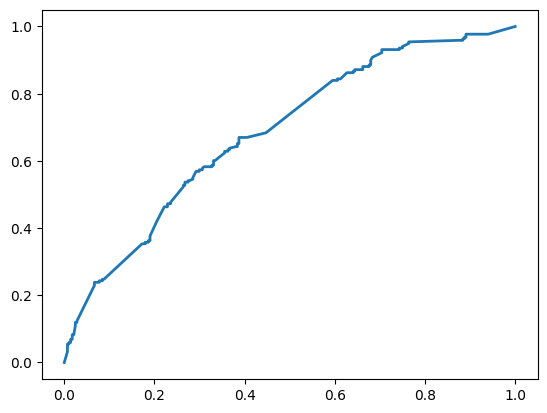

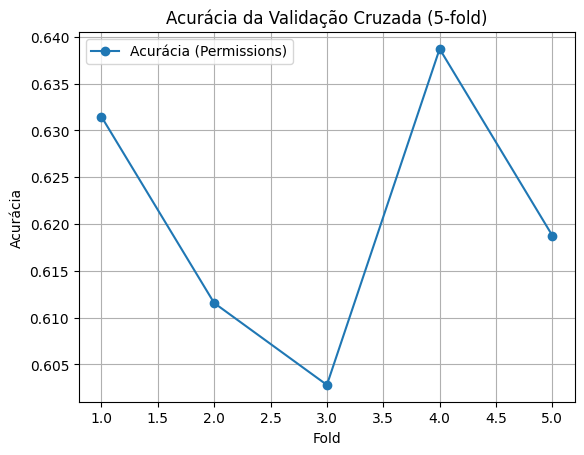

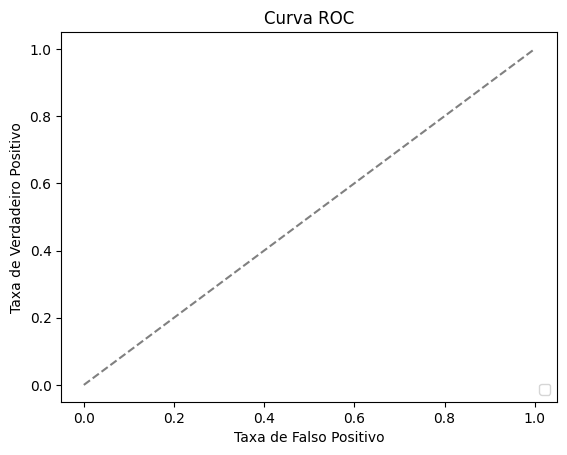

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Função para treinar e avaliar o modelo KNN para um conjunto de dados específico
def train_and_evaluate_knn(data_benign_path, data_malign_path, model_name):
    # Carregar os arquivos CSV
    data_benign = pd.read_csv(data_benign_path, encoding='ISO-8859-1', sep=';', on_bad_lines='skip')
    data_malign = pd.read_csv(data_malign_path, encoding='ISO-8859-1', sep=';', on_bad_lines='skip')

    # Adicionar coluna de rótulo
    data_malign['label'] = 1
    data_benign['label'] = 0

    # Remover a coluna "Nome do Arquivo" de cada dataset
    data_benign = data_benign.drop(columns=['Nome do Arquivo'])
    data_malign = data_malign.drop(columns=['Nome do Arquivo'])

    # Concatenar os dados
    data = pd.concat([data_benign, data_malign], ignore_index=True)

    # Preencher valores faltantes com 0
    data = data.fillna(0)

    # Remover colunas não numéricas (como hashes, nomes de arquivos, etc.)
    data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Separar características e rótulos
    X = data.drop('label', axis=1)
    y = data['label']

    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Padronizar os dados com StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Definir o intervalo de valores para n_neighbors
    param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20, 50, 75, 100]}

    # Realizar busca em grid para encontrar o melhor n_neighbors
    grid_search = GridSearchCV(KNeighborsClassifier(weights='distance'), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Melhor valor de n_neighbors encontrado
    best_n_neighbors = grid_search.best_params_['n_neighbors']
    print(f"\nMelhor valor de n_neighbors para {model_name}: {best_n_neighbors}")

    # Usar o melhor modelo encontrado no GridSearch
    knn_best = grid_search.best_estimator_

    # Fazer previsões com o melhor modelo
    y_pred = knn_best.predict(X_test)
    y_pred_prob = knn_best.predict_proba(X_test)[:, 1]

    # Gerar o relatório de classificação
    report = classification_report(y_test, y_pred, target_names=['benigno', 'maligno'])
    print(f"\nRelatório de Classificação para {model_name}:\n", report)

    # Exibir a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Matriz de Confusão para {model_name}:\n", conf_matrix)

    # Gráfico de Matriz de Confusão
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
    plt.xlabel("Classe Predita")
    plt.ylabel("Classe Verdadeira")
    plt.title(f"Matriz de Confusão para {model_name}")
    plt.show()

    # Gráfico de Acurácia (Validação Cruzada)
    cv_scores = cross_val_score(knn_best, X, y, cv=5)
    print(f"\nValidação Cruzada (5-fold) - Acurácia Média para {model_name}:", cv_scores.mean())
    plt.figure(1)
    plt.plot(range(1, 6), cv_scores, marker='o', label=f"Acurácia ({model_name})")

    # Gráfico ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(2)
    plt.plot(fpr, tpr, lw=2, label=f"{model_name} (área = {roc_auc:.2f})")

    # Salvando o modelo treinado
    arquivo_pickle = f"KNN_{model_name}_best.sav"
    pickle.dump(knn_best, open(arquivo_pickle, 'wb'))

# Chamando a função para os três conjuntos de dados
train_and_evaluate_knn('api_calls_2b.csv', 'api_calls_2m.csv', 'API_Calls')
train_and_evaluate_knn('opcodes_2b.csv', 'opcodes_2m.csv', 'Opcodes')
train_and_evaluate_knn('permissions_2b.csv', 'permissions_2m.csv', 'Permissions')

# Ajustando e exibindo o gráfico de acurácia
plt.figure(1)
plt.title("Acurácia da Validação Cruzada (5-fold)")
plt.xlabel("Fold")
plt.ylabel("Acurácia")
plt.grid()
plt.legend()
plt.show()

# Ajustando e exibindo o gráfico de ROC
plt.figure(2)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()



Melhor valor de n_neighbors para API_Calls: 50

Relatório de Classificação para API_Calls:
               precision    recall  f1-score   support

     benigno       1.00      0.97      0.99       277
     maligno       0.96      1.00      0.98       166

    accuracy                           0.98       443
   macro avg       0.98      0.99      0.98       443
weighted avg       0.98      0.98      0.98       443

Matriz de Confusão para API_Calls:
 [[270   7]
 [  0 166]]


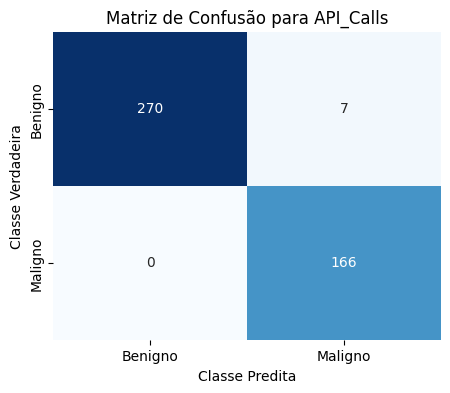


Validação Cruzada (5-fold) - Acurácia Média para API_Calls: 0.9656884875846501

Melhor valor de n_neighbors para Opcodes: 3

Relatório de Classificação para Opcodes:
               precision    recall  f1-score   support

     benigno       0.95      0.97      0.96       195
     maligno       0.95      0.90      0.93       105

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300

Matriz de Confusão para Opcodes:
 [[190   5]
 [ 10  95]]


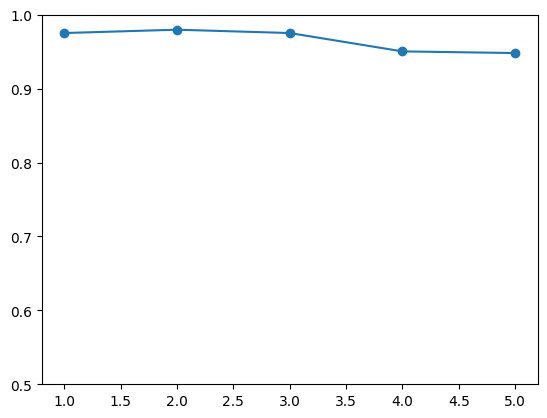

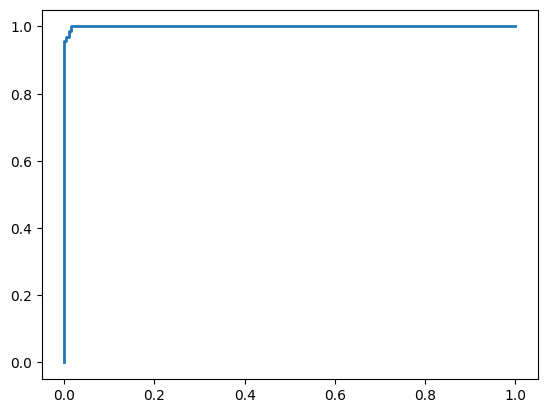

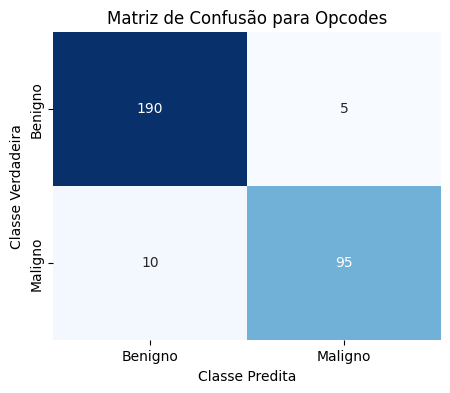


Validação Cruzada (5-fold) - Acurácia Média para Opcodes: 0.919953177257525

Melhor valor de n_neighbors para Permissions: 15

Relatório de Classificação para Permissions:
               precision    recall  f1-score   support

     benigno       0.67      0.71      0.69       284
     maligno       0.60      0.55      0.57       218

    accuracy                           0.64       502
   macro avg       0.64      0.63      0.63       502
weighted avg       0.64      0.64      0.64       502

Matriz de Confusão para Permissions:
 [[203  81]
 [ 98 120]]


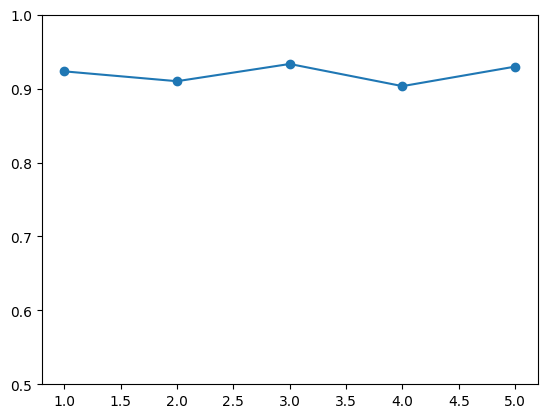

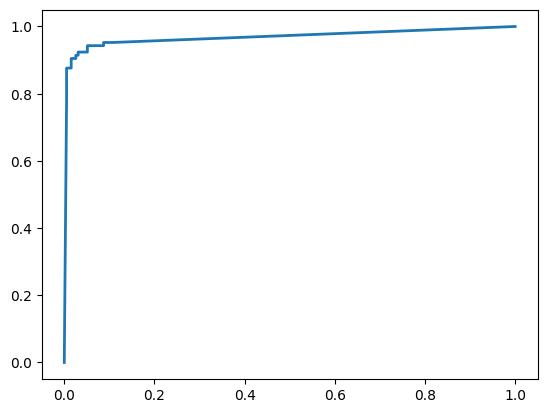

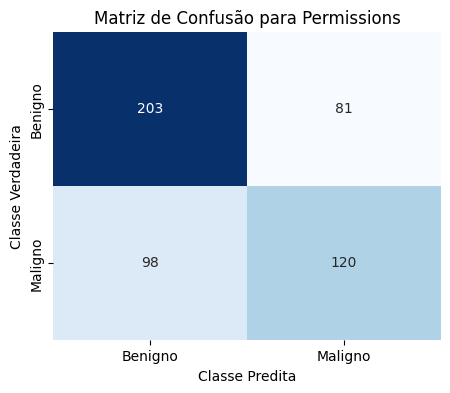


Validação Cruzada (5-fold) - Acurácia Média para Permissions: 0.6206614659127959


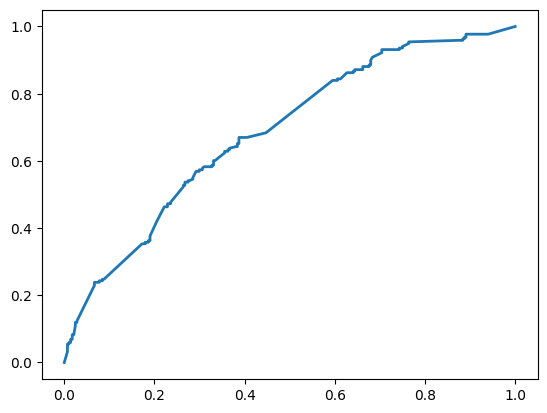

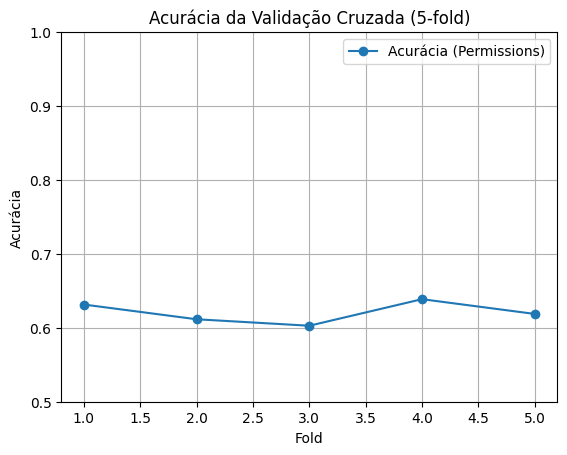

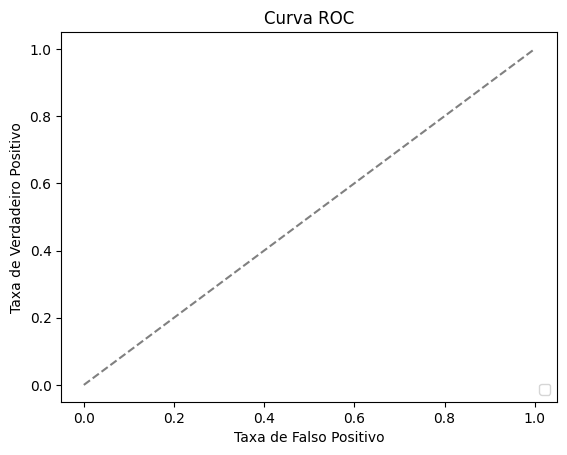

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Função para treinar e avaliar o modelo KNN para um conjunto de dados específico
def train_and_evaluate_knn(data_benign_path, data_malign_path, model_name):
    # Carregar os arquivos CSV
    data_benign = pd.read_csv(data_benign_path, encoding='ISO-8859-1', sep=';', on_bad_lines='skip')
    data_malign = pd.read_csv(data_malign_path, encoding='ISO-8859-1', sep=';', on_bad_lines='skip')

    # Adicionar coluna de rótulo
    data_malign['label'] = 1
    data_benign['label'] = 0

    # Remover a coluna "Nome do Arquivo" de cada dataset
    data_benign = data_benign.drop(columns=['Nome do Arquivo'])
    data_malign = data_malign.drop(columns=['Nome do Arquivo'])

    # Concatenar os dados
    data = pd.concat([data_benign, data_malign], ignore_index=True)

    # Preencher valores faltantes com 0
    data = data.fillna(0)

    # Remover colunas não numéricas (como hashes, nomes de arquivos, etc.)
    data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Separar características e rótulos
    X = data.drop('label', axis=1)
    y = data['label']

    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Padronizar os dados com StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Definir o intervalo de valores para n_neighbors
    param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20, 50, 75, 100]}

    # Realizar busca em grid para encontrar o melhor n_neighbors
    grid_search = GridSearchCV(KNeighborsClassifier(weights='distance'), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Melhor valor de n_neighbors encontrado
    best_n_neighbors = grid_search.best_params_['n_neighbors']
    print(f"\nMelhor valor de n_neighbors para {model_name}: {best_n_neighbors}")

    # Usar o melhor modelo encontrado no GridSearch
    knn_best = grid_search.best_estimator_

    # Fazer previsões com o melhor modelo
    y_pred = knn_best.predict(X_test)
    y_pred_prob = knn_best.predict_proba(X_test)[:, 1]

    # Gerar o relatório de classificação
    report = classification_report(y_test, y_pred, target_names=['benigno', 'maligno'])
    print(f"\nRelatório de Classificação para {model_name}:\n", report)

    # Exibir a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Matriz de Confusão para {model_name}:\n", conf_matrix)

    # Gráfico de Matriz de Confusão
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
    plt.xlabel("Classe Predita")
    plt.ylabel("Classe Verdadeira")
    plt.title(f"Matriz de Confusão para {model_name}")
    plt.show()

    # Gráfico de Acurácia (Validação Cruzada)
    cv_scores = cross_val_score(knn_best, X, y, cv=5)
    print(f"\nValidação Cruzada (5-fold) - Acurácia Média para {model_name}:", cv_scores.mean())
    plt.figure(1)
    plt.plot(range(1, 6), cv_scores, marker='o', label=f"Acurácia ({model_name})")
    plt.ylim(0.5, 1.0)  # Definir limites para o eixo y

    # Gráfico ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(2)
    plt.plot(fpr, tpr, lw=2, label=f"{model_name} (área = {roc_auc:.2f})")

    # Salvando o modelo treinado
    arquivo_pickle = f"KNN_{model_name}_best.sav"
    pickle.dump(knn_best, open(arquivo_pickle, 'wb'))

# Chamando a função para os três conjuntos de dados
train_and_evaluate_knn('api_calls_2b.csv', 'api_calls_2m.csv', 'API_Calls')
train_and_evaluate_knn('opcodes_2b.csv', 'opcodes_2m.csv', 'Opcodes')
train_and_evaluate_knn('permissions_2b.csv', 'permissions_2m.csv', 'Permissions')

# Ajustando e exibindo o gráfico de acurácia
plt.figure(1)
plt.title("Acurácia da Validação Cruzada (5-fold)")
plt.xlabel("Fold")
plt.ylabel("Acurácia")
plt.grid()
plt.legend()
plt.ylim(0.5, 1.0)  # Definir limites para o eixo y
plt.show()

# Ajustando e exibindo o gráfico de ROC
plt.figure(2)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()
